In [1]:
# Import Packages

import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

In [2]:
# Set matplotlib axes label

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [3]:
# Setup Figure Saving
 
fig_dir_path = os.path.join( ".", "figs" )
os.makedirs( fig_dir_path, exist_ok=True )

def save_this( fig_id, tight_layout=True, fig_extension = "png", resolution = 300 ):
  fig_full_path = os.path.join( fig_dir_path, fig_id + '.' + fig_extension )
  print( "saving figure", fig_id )
  if tight_layout:
    plt.tight_layout( )
  plt.savefig( fig_full_path, dpi=resolution, format=fig_extension )

In [4]:
# Read input data

df = pd.read_csv( 'input/SeoulBikeData_MP1 Old.csv' )
df.head( )

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rain,Precip
0,0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,False,False
1,1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,False,False
2,2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,False,False
3,3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,False,False
4,4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,False,False


In [5]:
df.shape

(8760, 17)

In [6]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8760 non-null   int64  
 1   Date                      8760 non-null   object 
 2   Rented Bike Count         8760 non-null   int64  
 3   Hour                      8760 non-null   int64  
 4   Temperature(C)            8260 non-null   float64
 5   Humidity(%)               8760 non-null   int64  
 6   Wind speed (m/s)          8760 non-null   float64
 7   Visibility (10m)          8760 non-null   int64  
 8   Dew point temperature(C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)   8760 non-null   float64
 10  Rainfall(mm)              8760 non-null   float64
 11  Snowfall (cm)             8760 non-null   float64
 12  Seasons                   8760 non-null   object 
 13  Holiday                   8760 non-null   object 
 14  Function

In [7]:
df.drop( 'Unnamed: 0', inplace=True, axis='columns' )

In [8]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8260 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
 14  Rain    

In [9]:
df['Date'].value_counts( )

01-12-2017    24
09-08-2018    24
07-08-2018    24
06-08-2018    24
05-08-2018    24
              ..
31-03-2018    24
30-03-2018    24
29-03-2018    24
28-03-2018    24
30-11-2018    24
Name: Date, Length: 365, dtype: int64

In [10]:
df['Hour'].value_counts( )

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

In [11]:
df['Seasons'].value_counts( ) / 24

Spring    92.0
Summer    92.0
Autumn    91.0
Winter    90.0
Name: Seasons, dtype: float64

In [12]:
df['Holiday'].value_counts( )

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [13]:
df['Functioning Day'].value_counts( )

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [14]:
df[ df['Functioning Day'] == 'No' ]['Rented Bike Count'].sum( )

0

Rented Bike Count will always be zero if Functioning Day is No

In [15]:
df['Rain'].value_counts( )

False    8232
True      528
Name: Rain, dtype: int64

In [16]:
df['Precip'].value_counts( )

False    7817
True      943
Name: Precip, dtype: int64

# If Rain is True then Precip will also be True

In [17]:
df[ (df['Rain'] == True) & (df['Precip'] == False) ].shape

(0, 16)

In [18]:
df.describe( )

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8260.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.877349,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.957556,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.500000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.750000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [19]:
df[ df['Functioning Day'] == 'Yes' ]['Rented Bike Count'].describe( )

count    8465.000000
mean      729.156999
std       642.351166
min         2.000000
25%       214.000000
50%       542.000000
75%      1084.000000
max      3556.000000
Name: Rented Bike Count, dtype: float64

saving figure df_value_histogram


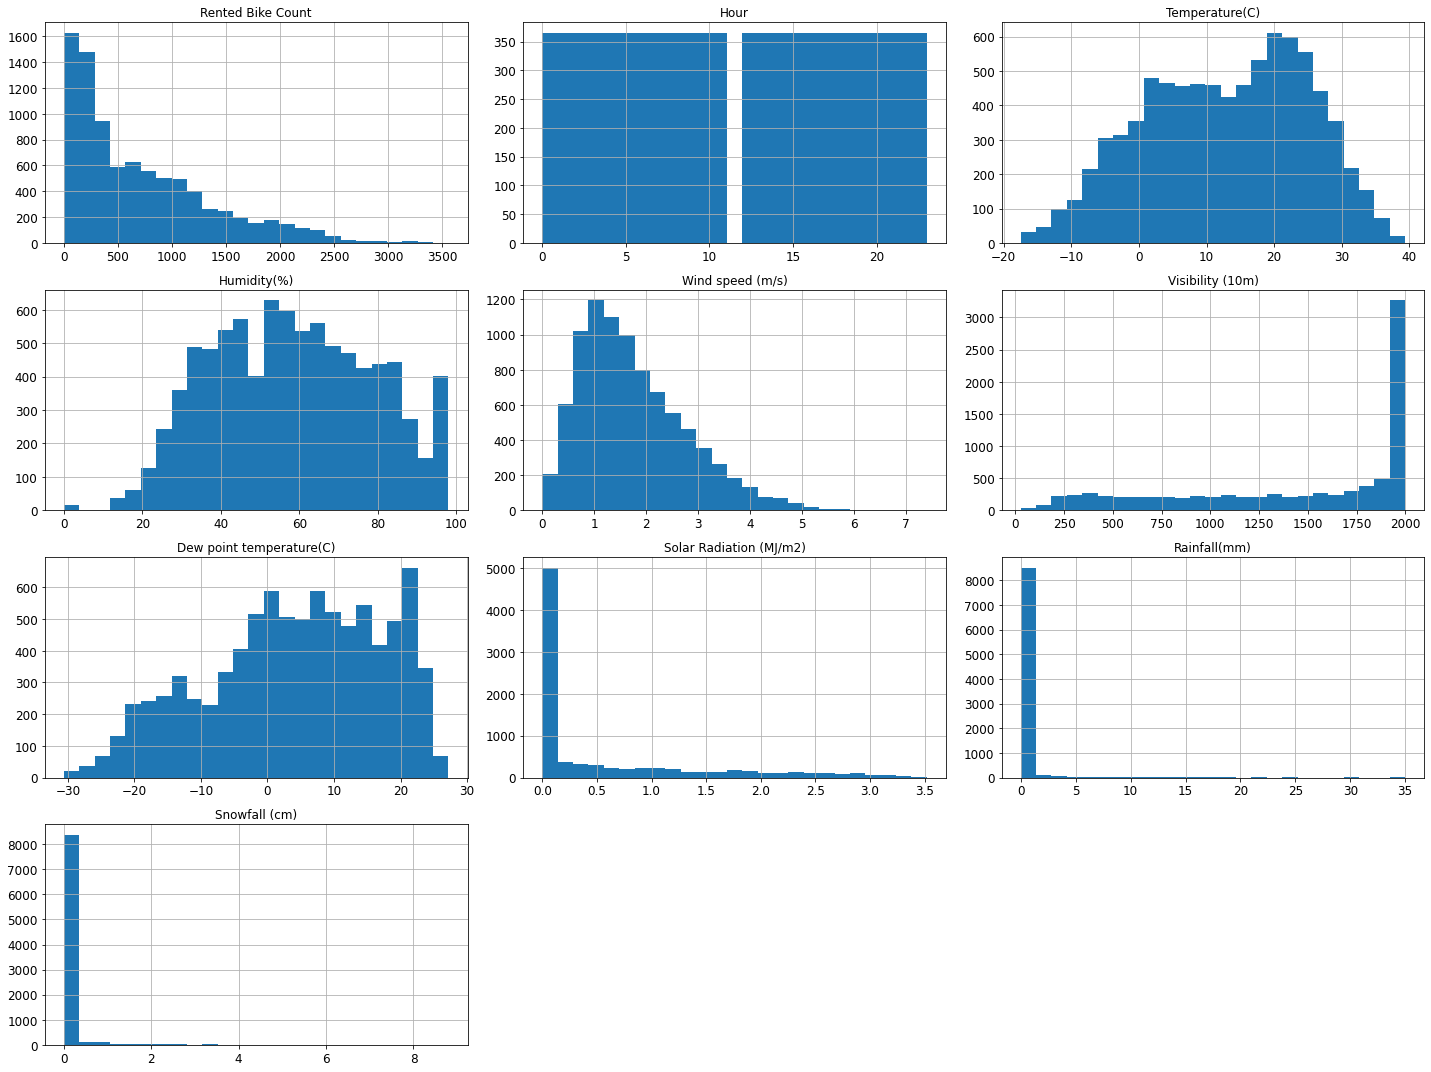

In [20]:
df.hist( bins=25, figsize=(20,15) )
save_this( "df_value_histogram" )

In [21]:
df_train, df_test = train_test_split( df, test_size=0.2, random_state=42 )

bike_df = df_train.copy( )

In [22]:
bike_df['Day'] = bike_df['Date'].astype( str ).str[:2]
bike_df['Month'] = bike_df['Date'].astype( str ).str[3:5]
bike_df['Year'] = bike_df['Date'].astype( str ).str[6:10]

In [23]:
bike_df['Weekday'] = pd.to_datetime( bike_df['Date'], infer_datetime_format=True ).dt.dayofweek

In [24]:
bike_df['Weekday'].value_counts( )

5    1016
1    1014
2    1011
4    1010
6     995
3     990
0     972
Name: Weekday, dtype: int64

In [25]:
bike_df.groupby(['Weekday'])['Rented Bike Count'].describe( )

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,972.0,731.656379,665.949650,2.0,190.00,541.0,1099.00,3380.0
1,1014.0,693.000000,649.202265,0.0,183.25,495.5,1036.50,3404.0
2,1011.0,736.290801,686.900792,0.0,196.50,509.0,1098.00,3384.0
3,990.0,701.970707,649.471723,0.0,187.00,507.0,1068.00,3418.0
4,1010.0,739.316832,643.760956,0.0,232.25,569.0,1108.75,3196.0
5,1016.0,707.317913,604.786126,0.0,219.00,517.0,1073.50,2497.0
6,995.0,623.572864,604.839699,0.0,161.50,407.0,931.00,2514.0


In [26]:
bike_df.corr( )['Rented Bike Count'].sort_values( ascending=False )

Rented Bike Count           1.000000
Temperature(C)              0.538230
Hour                        0.418294
Dew point temperature(C)    0.377737
Solar Radiation (MJ/m2)     0.258930
Visibility (10m)            0.204672
Wind speed (m/s)            0.121388
Weekday                    -0.032051
Rainfall(mm)               -0.123586
Snowfall (cm)              -0.141440
Humidity(%)                -0.202004
Rain                       -0.212752
Precip                     -0.285473
Name: Rented Bike Count, dtype: float64

# Precip logic

In [27]:
bike_df['Precip_test'] = np.where( (bike_df['Rainfall(mm)']>0) | (bike_df['Snowfall (cm)']>0), True, False )

In [28]:
bike_df['Precip_test'].value_counts( )

False    6248
True      760
Name: Precip_test, dtype: int64

In [29]:
bike_df['Precip'].value_counts( )

False    6248
True      760
Name: Precip, dtype: int64

In [30]:
bike_df.drop( columns=['Precip_test'], inplace=True )

# Precip Model (This is completely useless to the requirements)

In [31]:
bike_df.corr( )['Precip'].sort_values( ascending=False )

Precip                      1.000000
Rain                        0.730351
Snowfall (cm)               0.490373
Rainfall(mm)                0.384265
Humidity(%)                 0.333091
Wind speed (m/s)            0.005499
Weekday                    -0.019295
Dew point temperature(C)   -0.026782
Hour                       -0.039865
Solar Radiation (MJ/m2)    -0.159358
Temperature(C)             -0.167090
Visibility (10m)           -0.253241
Rented Bike Count          -0.285473
Name: Precip, dtype: float64

Snowfall (cm), Rainfall(mm), Humidity(%), Visibility (10m) can be used to predict precip

In [32]:
precip_df = bike_df[ ['Snowfall (cm)', 'Rainfall(mm)', 'Humidity(%)', 
                      'Solar Radiation (MJ/m2)', 'Temperature(C)', 
                      'Visibility (10m)', 'Precip'] ].copy( )

precip_df.head( )

,Snowfall (cm),Rainfall(mm),Humidity(%),Solar Radiation (MJ/m2),Temperature(C),Visibility (10m),Precip
8415,0.0,0.0,61,1.03,13.2,719,False
5049,0.0,0.0,86,0.76,22.9,538,False
8395,0.0,0.0,46,0.00,11.2,869,False
1535,0.0,0.0,69,0.00,-2.6,1434,False
5518,0.0,0.0,73,0.00,27.2,1005,False


In [33]:
precip_df.shape

(7008, 7)

In [34]:
precip_df.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7008 entries, 8415 to 7270
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Snowfall (cm)            7008 non-null   float64
 1   Rainfall(mm)             7008 non-null   float64
 2   Humidity(%)              7008 non-null   int64  
 3   Solar Radiation (MJ/m2)  7008 non-null   float64
 4   Temperature(C)           6611 non-null   float64
 5   Visibility (10m)         7008 non-null   int64  
 6   Precip                   7008 non-null   bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 390.1 KB


In [35]:
precip_df_train, precip_df_test = train_test_split( precip_df, test_size=0.15, random_state=42 )

print( precip_df_train.shape )
print( precip_df_test.shape )

(5956, 7)
(1052, 7)


In [36]:
median_temp = precip_df_train.dropna( subset=['Temperature(C)'] )['Temperature(C)'].median( )
print( median_temp )

13.8


In [37]:
precip_df_train['Temperature(C)'].fillna( median_temp, inplace=True )
precip_df_test['Temperature(C)'].fillna( median_temp, inplace=True )

In [38]:
from sklearn.naive_bayes import GaussianNB
import pickle

precip_df_train_X = precip_df_train.drop( columns=['Precip'] )
precip_df_train_y = precip_df_train['Precip']

gnb = GaussianNB( )

precip_model = gnb.fit( precip_df_train_X, precip_df_train_y )
pickle.dump( precip_model, open('models/precip_model.bin', 'wb') )

In [39]:
loaded_precip_model = pickle.load( open('models/precip_model.bin', 'rb') )

In [40]:
precip_df_train_pred = loaded_precip_model.predict( precip_df_train_X )
precip_df_train_pred = pd.Series( precip_df_train_pred )

In [41]:
precip_df_train_pred.value_counts( )

False    5307
True      649
dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix( precip_df_train_y, precip_df_train_pred )

array([[5304,    0],
       [   3,  649]], dtype=int64)

In [43]:
precip_df_test_X = precip_df_test.drop( columns=['Precip'] )
precip_df_test_y = precip_df_test['Precip']

precip_df_test_pred = loaded_precip_model.predict( precip_df_test_X )
precip_df_test_pred = pd.Series( precip_df_test_pred )

In [44]:
precip_df_test_pred.value_counts( )

False    944
True     108
dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix( precip_df_test_y, precip_df_test_pred )

array([[944,   0],
       [  0, 108]], dtype=int64)

# Rain Logic

In [46]:
bike_df.corr( )['Rain'].sort_values( ascending=False )

Rain                        1.000000
Precip                      0.730351
Rainfall(mm)                0.526137
Humidity(%)                 0.397400
Dew point temperature(C)    0.201493
Temperature(C)              0.071170
Snowfall (cm)               0.023428
Weekday                    -0.002510
Hour                       -0.032044
Wind speed (m/s)           -0.043188
Solar Radiation (MJ/m2)    -0.133911
Rented Bike Count          -0.212752
Visibility (10m)           -0.264029
Name: Rain, dtype: float64

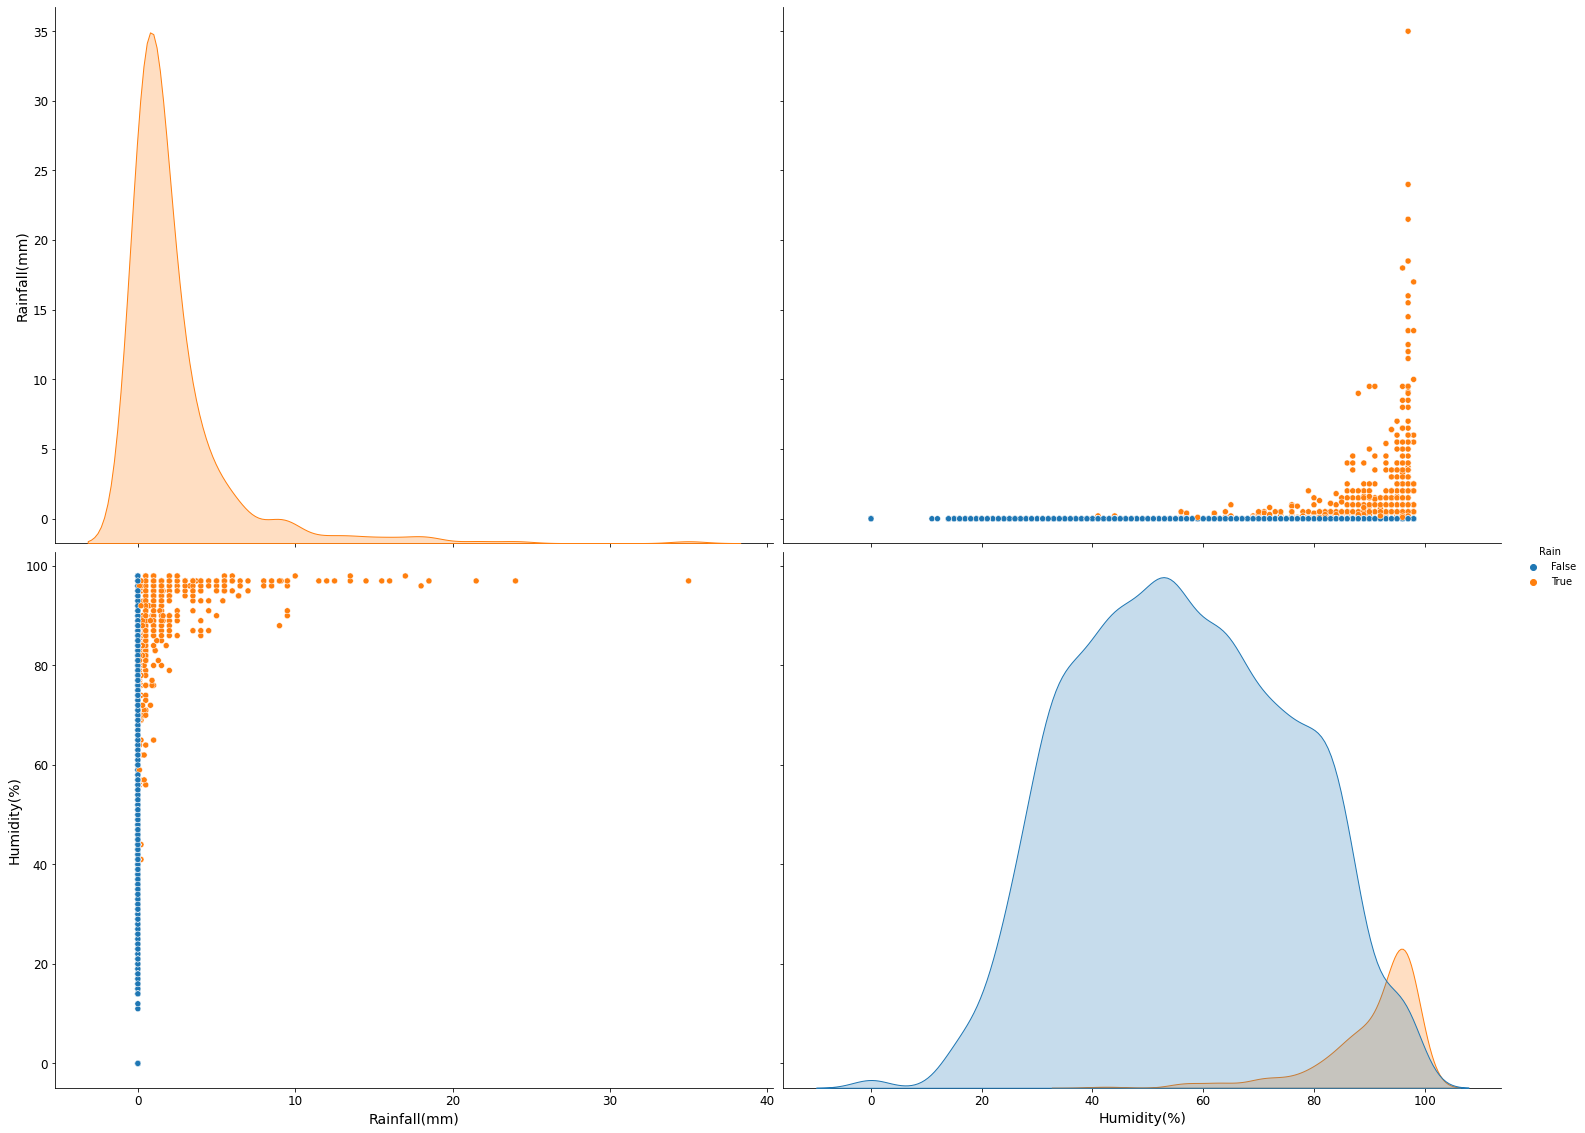

In [47]:
cols_needed = [ 'Rainfall(mm)', 'Humidity(%)', 'Rain' ]
sns.pairplot( data=bike_df[cols_needed], hue='Rain', height=8, aspect=8/6 ) #This will take some time

In [48]:
bike_df['Rain_test'] = np.where( bike_df['Rainfall(mm)']>0, True, False )

In [49]:
bike_df['Rain_test'].value_counts( )

False    6581
True      427
Name: Rain_test, dtype: int64

In [50]:
bike_df['Rain'].value_counts( )

False    6581
True      427
Name: Rain, dtype: int64

In [51]:
bike_df[ bike_df['Rain']!=bike_df['Rain_test'] ].shape

(0, 21)

In [52]:
bike_df.drop( columns=['Rain_test'], inplace=True )

In [53]:
bike_df.corr( )['Rain']['Rented Bike Count']

-0.21275176533032358

# Snow Bool?

In [54]:
bike_df['Snow'] = np.where( bike_df['Snowfall (cm)']>0, True, False )

In [55]:
bike_df['Snow'].value_counts( )

False    6650
True      358
Name: Snow, dtype: int64

In [56]:
bike_df.corr( )['Snow']['Rented Bike Count']

-0.1872721066197821

In [57]:
bike_df.corr( )['Temperature(C)'].sort_values( ascending=False )

Temperature(C)              1.000000
Dew point temperature(C)    0.910469
Rented Bike Count           0.538230
Solar Radiation (MJ/m2)     0.356301
Humidity(%)                 0.146738
Hour                        0.126586
Rain                        0.071170
Rainfall(mm)                0.046717
Visibility (10m)            0.044345
Weekday                    -0.003579
Wind speed (m/s)           -0.033718
Precip                     -0.167090
Snowfall (cm)              -0.217102
Snow                       -0.333080
Name: Temperature(C), dtype: float64

# Functioning Day

In [58]:
bike_df[ bike_df['Functioning Day']=='Yes' ].corr( )['Rented Bike Count'].sort_values( ascending=False )

Rented Bike Count           1.000000
Temperature(C)              0.562200
Hour                        0.433893
Dew point temperature(C)    0.398076
Solar Radiation (MJ/m2)     0.273859
Visibility (10m)            0.218524
Wind speed (m/s)            0.125457
Weekday                    -0.037368
Rainfall(mm)               -0.129028
Snowfall (cm)              -0.151255
Snow                       -0.200571
Humidity(%)                -0.206136
Rain                       -0.224005
Precip                     -0.303064
Name: Rented Bike Count, dtype: float64

In [59]:
bike_df.corr( )['Rented Bike Count'].sort_values( ascending=False )

Rented Bike Count           1.000000
Temperature(C)              0.538230
Hour                        0.418294
Dew point temperature(C)    0.377737
Solar Radiation (MJ/m2)     0.258930
Visibility (10m)            0.204672
Wind speed (m/s)            0.121388
Weekday                    -0.032051
Rainfall(mm)               -0.123586
Snowfall (cm)              -0.141440
Snow                       -0.187272
Humidity(%)                -0.202004
Rain                       -0.212752
Precip                     -0.285473
Name: Rented Bike Count, dtype: float64

# Cyclic Encoding

In [60]:
bike_df = bike_df[ bike_df['Functioning Day']=='Yes' ]
bike_df.drop( columns=['Functioning Day'], inplace=True )

In [61]:
bike_df['Seasons'] = bike_df['Seasons'].replace( {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3} )

In [62]:
bike_df['Holiday'] = bike_df['Holiday'].replace( {'Holiday': True, 'No Holiday': False} )

In [63]:
bike_df['Date'] = pd.to_datetime( bike_df['Date'], infer_datetime_format=True )
    
bike_df['Weekday'] = bike_df['Date'].dt.dayofweek
bike_df['Day'] = bike_df['Date'].dt.day
bike_df['Month'] = bike_df['Date'].dt.month

bike_df.drop( columns=['Date'], inplace=True )

In [64]:
bike_df.corr( )['Rented Bike Count'].sort_values( ascending=False )

Rented Bike Count           1.000000
Temperature(C)              0.562200
Hour                        0.433893
Seasons                     0.423301
Dew point temperature(C)    0.398076
Solar Radiation (MJ/m2)     0.273859
Visibility (10m)            0.218524
Month                       0.170317
Wind speed (m/s)            0.125457
Day                         0.007725
Weekday                    -0.037368
Holiday                    -0.076288
Rainfall(mm)               -0.129028
Snowfall (cm)              -0.151255
Snow                       -0.200571
Humidity(%)                -0.206136
Rain                       -0.224005
Precip                     -0.303064
Name: Rented Bike Count, dtype: float64

In [65]:
# Cyclic Encoding
bike_df['Hour_sin'] = np.sin( 2 * np.pi * bike_df['Hour'] / 23.0 )
bike_df['Hour_cos'] = np.cos( 2 * np.pi * bike_df['Hour'] / 23.0 )

bike_df['Seasons_sin'] = np.sin( 2 * np.pi * bike_df['Seasons'] / 3.0 )
bike_df['Seasons_cos'] = np.cos( 2 * np.pi * bike_df['Seasons'] / 3.0 )

bike_df['Weekday_sin'] = np.sin( 2 * np.pi * bike_df['Weekday'] / 3.0 )
bike_df['Weekday_cos'] = np.cos( 2 * np.pi * bike_df['Weekday'] / 3.0 )

bike_df['Day_sin'] = np.sin( 2 * np.pi * ( bike_df['Day'] - 1 ) / 30.0 )
bike_df['Day_cos'] = np.cos( 2 * np.pi * ( bike_df['Day'] - 1 )/ 30.0 )

bike_df['Month_sin'] = np.sin( 2 * np.pi * ( bike_df['Month'] - 1 ) / 11.0 )
bike_df['Month_cos'] = np.cos( 2 * np.pi * ( bike_df['Month'] - 1 ) / 11.0 )

bike_df.drop( columns=['Day', 'Month', 'Hour', 'Seasons', 'Weekday', 'Year'], inplace=True )

In [66]:
bike_df.corr( )['Rented Bike Count'].sort_values( ascending=False )

Rented Bike Count           1.000000
Temperature(C)              0.562200
Dew point temperature(C)    0.398076
Solar Radiation (MJ/m2)     0.273859
Visibility (10m)            0.218524
Wind speed (m/s)            0.125457
Day_sin                     0.010626
Weekday_sin                 0.007840
Day_cos                    -0.022846
Hour_cos                   -0.033910
Weekday_cos                -0.040930
Holiday                    -0.076288
Rainfall(mm)               -0.129028
Snowfall (cm)              -0.151255
Month_sin                  -0.161665
Seasons_sin                -0.164770
Snow                       -0.200571
Humidity(%)                -0.206136
Rain                       -0.224005
Seasons_cos                -0.253747
Precip                     -0.303064
Month_cos                  -0.445776
Hour_sin                   -0.458301
Name: Rented Bike Count, dtype: float64

In [67]:
median_temp = bike_df.dropna( subset=['Temperature(C)'] )['Temperature(C)'].median( )

bike_df['Temperature(C)'].fillna( median_temp, inplace=True )

In [68]:
bike_df_x = bike_df.drop( columns=['Rented Bike Count'] )
bike_df_y = bike_df['Rented Bike Count']

In [69]:
scaler = StandardScaler( )

scaler.fit( bike_df_x )
scaled_ndarray = scaler.transform( bike_df_x )
scaled_bike_df_x = pd.DataFrame( scaled_ndarray, columns=bike_df_x.columns, index=bike_df_x.index )    

In [70]:
lin_reg = LinearRegression( )
lin_reg_model = lin_reg.fit( scaled_bike_df_x, bike_df_y )

y_pred = lin_reg_model.predict( scaled_bike_df_x )
print( 'Mean Squared Error = ' + str(mean_squared_error( bike_df_y, y_pred, squared=False )) )

print( np.sum( np.abs( (bike_df_y - y_pred) ) ) / len( bike_df_y ) )

Mean Squared Error = 423.7106054352867
316.03073942507837


In [71]:
inside_brain = pd.DataFrame( )

inside_brain['theta'] = lin_reg_model.coef_
inside_brain['feature'] = bike_df_x.columns.tolist( ) 

In [72]:
inside_brain.sort_values( by=['theta'] )

,theta,feature
21,-322.222521,Month_cos
12,-250.498249,Hour_sin
1,-206.649300,Humidity(%)
10,-188.308909,Precip
5,-119.953212,Solar Radiation (MJ/m2)
13,-60.070434,Hour_cos
20,-41.027494,Month_sin
8,-34.366616,Holiday
17,-21.119409,Weekday_cos
6,-15.092994,Rainfall(mm)


# Polynomial in the Desert?

In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform( bike_df ) 

array([[ 1.00000000e+00,  9.95000000e+02,  1.32000000e+01, ...,
         2.92292493e-01, -4.54815998e-01,  7.07707507e-01],
       [ 1.00000000e+00,  1.19500000e+03,  2.29000000e+01, ...,
         7.93732336e-02, -2.70320409e-01,  9.20626766e-01],
       [ 1.00000000e+00,  1.44800000e+03,  1.12000000e+01, ...,
         2.92292493e-01, -4.54815998e-01,  7.07707507e-01],
       ...,
       [ 1.00000000e+00,  9.99000000e+02,  2.95000000e+01, ...,
         7.93732336e-02,  2.70320409e-01,  9.20626766e-01],
       [ 1.00000000e+00,  3.22000000e+02, -3.40000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.50100000e+03,  1.93000000e+01, ...,
         9.79746487e-01,  1.40866278e-01,  2.02535132e-02]])

In [94]:
poly.get_feature_names_out( )

array(['1', 'Rented Bike Count', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Holiday', 'Rain', 'Precip', 'Snow', 'Hour_sin', 'Hour_cos',
       'Seasons_sin', 'Seasons_cos', 'Weekday_sin', 'Weekday_cos',
       'Day_sin', 'Day_cos', 'Month_sin', 'Month_cos',
       'Rented Bike Count^2', 'Rented Bike Count Temperature(C)',
       'Rented Bike Count Humidity(%)',
       'Rented Bike Count Wind speed (m/s)',
       'Rented Bike Count Visibility (10m)',
       'Rented Bike Count Dew point temperature(C)',
       'Rented Bike Count Solar Radiation (MJ/m2)',
       'Rented Bike Count Rainfall(mm)',
       'Rented Bike Count Snowfall (cm)', 'Rented Bike Count Holiday',
       'Rented Bike Count Rain', 'Rented Bike Count Precip',
       'Rented Bike Count Snow', 'Rented Bike Count Hour_sin',
       'Rented Bike Count Hour_cos', 'Rented Bike Count Seasons_s

In [77]:
bike_df[ poly.get_feature_names_out( bike_df.columns ) ] = poly.fit_transform( bike_df ) 

C:\Users\yotit\anaconda3\envs\pml\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [93]:
corr_df = bike_df.corr( )['Rented Bike Count'].sort_values( ascending=False )
print(corr_df.to_markdown( ))

|                                                  |   Rented Bike Count |
|:-------------------------------------------------|--------------------:|
| Rented Bike Count                                |         1           |
| Rented Bike Count^2                              |         0.940359    |
| Rented Bike Count Visibility (10m)               |         0.915379    |
| Rented Bike Count Temperature(C)                 |         0.910875    |
| Rented Bike Count Humidity(%)                    |         0.900781    |
| Rented Bike Count Wind speed (m/s)               |         0.822876    |
| Rented Bike Count Dew point temperature(C)       |         0.718515    |
| Temperature(C) Visibility (10m)                  |         0.567968    |
| Temperature(C)                                   |         0.546457    |
| Temperature(C) Wind speed (m/s)                  |         0.534341    |
| Rented Bike Count Solar Radiation (MJ/m2)        |         0.498645    |
| Temperature(C)^2       